In [1]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.decomposition import PCA

In [2]:
from sklearn.model_selection import train_test_split
data=pd.read_csv('E:/Machine Learning/TestB/train_data.csv')
target=pd.read_csv('E:/Machine Learning/TestB/target.csv')



In [18]:
test=pd.read_csv('E:/Machine Learning/TestB/testb_data.csv')

In [27]:
pca=PCA(n_components=60)
pca.fit(data)
pca.explained_variance_ratio_

60

In [28]:
x=pca.transform(data)
x.shape

In [31]:
train_x,test_x,train_y,test_y=train_test_split(x,target,test_size=0.2,random_state=2020)

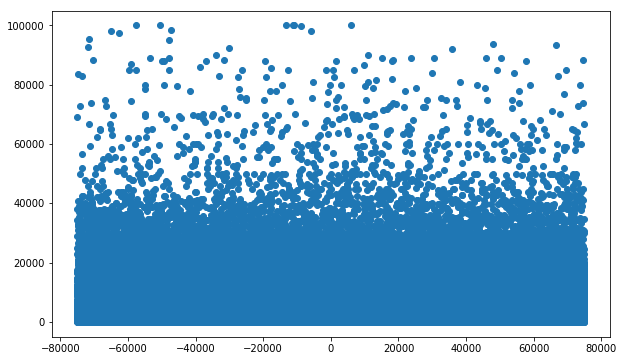

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(x[:,0],target)
plt.show()

In [14]:
data.head()

,power,kilometer,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,...,model_class_std,used_time,estivalue,estivalue_count,estivalue_price_average,estivalue_price_max,estivalue_price_median,estivalue_price_min,estivalue_price_sum,estivalueprice_std
0,0.160000,0.827586,0.590596,0.711261,0.192329,0.550784,0.492084,0.807557,0.673547,0.092210,...,0.254663,0.470440,0.857143,0.599224,0.064488,1.000000,0.057043,0.044944,0.281513,0.075983
1,0.000000,1.000000,0.679716,0.820574,0.196059,0.505302,0.262857,0.907274,0.799128,0.096610,...,0.254663,0.511167,0.857143,0.599224,0.064488,1.000000,0.057043,0.044944,0.281513,0.075983
2,0.434667,0.827586,0.710518,0.785078,0.246327,0.366414,0.300847,0.861471,0.758900,0.117548,...,0.000000,0.470112,0.857143,0.599224,0.064488,1.000000,0.057043,0.044944,0.281513,0.075983
3,0.514667,1.000000,0.697207,0.756563,0.188038,0.476285,0.190861,0.939881,0.728440,0.086811,...,0.000000,0.770418,1.000000,1.000000,0.000000,1.000000,0.000000,0.011236,0.233912,0.000000
4,0.181333,0.310345,0.637535,0.544686,0.214533,0.332976,0.590558,0.781377,0.483458,0.065398,...,0.254663,0.157981,0.428571,0.260950,0.484449,0.733431,0.471698,0.044944,0.593934,0.480165


In [3]:
y=np.log(target)

In [32]:
xgb_reg= xgb.XGBRegressor(max_depth=6,learning_rate= 0.3, verbosity=1,n_estimators=200 ,
                                     objective='reg:squarederror',random_state=1)
xgb_reg.fit(train_x,train_y, early_stopping_rounds=30, eval_metric=['rmse','mae'],
        eval_set=[(test_x,test_y)])

[0]	validation_0-rmse:7214.78	validation_0-mae:4226.96
Multiple eval metrics have been passed: 'validation_0-mae' will be used for early stopping.

Will train until validation_0-mae hasn't improved in 30 rounds.
[1]	validation_0-rmse:5635.67	validation_0-mae:3170.53
[2]	validation_0-rmse:4558.29	validation_0-mae:2504.87
[3]	validation_0-rmse:3874.01	validation_0-mae:2102.46
[4]	validation_0-rmse:3396.5	validation_0-mae:1856.13
[5]	validation_0-rmse:3069.27	validation_0-mae:1677.82
[6]	validation_0-rmse:2850.31	validation_0-mae:1579.38
[7]	validation_0-rmse:2699.62	validation_0-mae:1504.82
[8]	validation_0-rmse:2572.48	validation_0-mae:1441.43
[9]	validation_0-rmse:2502.99	validation_0-mae:1396.2
[10]	validation_0-rmse:2446.48	validation_0-mae:1364.68
[11]	validation_0-rmse:2393.83	validation_0-mae:1333.96
[12]	validation_0-rmse:2351.71	validation_0-mae:1306.49
[13]	validation_0-rmse:2318.68	validation_0-mae:1287.25
[14]	validation_0-rmse:2290.59	validation_0-mae:1269.85
[15]	validation

[144]	validation_0-rmse:1815.84	validation_0-mae:922.768
[145]	validation_0-rmse:1815.32	validation_0-mae:922.445
[146]	validation_0-rmse:1815.27	validation_0-mae:922.11
[147]	validation_0-rmse:1813.24	validation_0-mae:921.95
[148]	validation_0-rmse:1812.89	validation_0-mae:921.669
[149]	validation_0-rmse:1812.35	validation_0-mae:921.461
[150]	validation_0-rmse:1812.44	validation_0-mae:921.359
[151]	validation_0-rmse:1811.87	validation_0-mae:920.956
[152]	validation_0-rmse:1811.97	validation_0-mae:921.032
[153]	validation_0-rmse:1811.56	validation_0-mae:920.66
[154]	validation_0-rmse:1810.83	validation_0-mae:920.03
[155]	validation_0-rmse:1810.34	validation_0-mae:919.522
[156]	validation_0-rmse:1809.83	validation_0-mae:918.843
[157]	validation_0-rmse:1809.06	validation_0-mae:918.345
[158]	validation_0-rmse:1808.86	validation_0-mae:917.872
[159]	validation_0-rmse:1807.81	validation_0-mae:916.625
[160]	validation_0-rmse:1807.77	validation_0-mae:916.381
[161]	validation_0-rmse:1807.48	val

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.3, max_delta_step=0,
       max_depth=6, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='reg:squarederror',
       random_state=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=None, subsample=1, verbosity=1)

In [11]:
xgb_pre=xgb_reg.predict(test_x)
xgb_test_mse=mean_absolute_error(np.exp(test_y),np.exp(xgb_pre))
train_pre=xgb_reg.predict(train_x)
score=mean_absolute_error(np.exp(train_y),np.exp(train_pre))
print('xgb_test_mse:{}'.format(xgb_test_mse))
print('train_score.{}'.format(score))

xgb_test_mse:609.9171244345982
train_score.494.10837830967904


In [5]:
gsCv = GridSearchCV(xgb_reg,
                   {'max_depth': [5,7,10,15],
                    'n_estimators': [40,60]})
gsCv.fit(train_x,train_y)
print(gsCv.best_score_)
print(gsCv.best_params_)

0.9606672955495924
{'max_depth': 5, 'n_estimators': 60}


In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [35]:
#n_estimators=40时有一个最小误差
forest_reg=RandomForestRegressor(n_estimators=100, criterion='mse',oob_score = True, n_jobs = -1,
                                max_depth=None, min_samples_split=4, min_samples_leaf=6)
forest_reg.fit(train_x,train_y)
forest_pre=forest_reg.predict(test_x)
forest_test_mae=mean_absolute_error(test_y,forest_pre)
train_pre=forest_reg.predict(train_x)
score=mean_absolute_error(train_y,train_pre)
print('forest_test_mse:{}'.format(forest_test_mae))
print('train_score.{}'.format(score))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


forest_test_mse:932.7289558971514
train_score.560.3161702897647


In [9]:
forest_pre=forest_reg.predict(test_x)
forest_test_mse=mean_absolute_error(np.exp(test_y),np.exp(forest_pre))
train_pre=forest_reg.predict(train_x)
score=mean_absolute_error(np.exp(train_y),np.exp(train_pre))
print('forest_test_mse:{}'.format(forest_test_mse))
print('train_score.{}'.format(score))

forest_test_mse:764.4319723742368
train_score.707.1650801195339


In [2]:
#保存模型
from sklearn.externals import joblib
from sklearn.ensemble import RandomForestRegressor
#lr是一个LogisticRegression模型
#joblib.dump(forest_reg, r'E:\Machine Learning\forest_reg_598.pkl')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
model=joblib.load('E:/Machine Learning/forest_reg_598.pkl')

In [ ]:
test.head()

In [15]:
price=xgb_reg.predict(test)
price=np.exp(price)

In [16]:
l=list(range(200000,250000))
TestB_pre=pd.DataFrame({'SaleID':l,'price':price})
TestB_pre.head()

,SaleID,price
0,200000,1082.243652
1,200001,2097.785889
2,200002,7707.743164
3,200003,716.700745
4,200004,2385.581787


In [17]:
forest_pri=forest_reg.predict(test)

In [18]:
TestB_pre['price_583']=np.exp(forest_pri)

In [19]:
TestB_pre.head()

,SaleID,price,price_583
0,200000,1082.243652,977.807216
1,200001,2097.785889,1600.906717
2,200002,7707.743164,5985.823419
3,200003,716.700745,1194.971724
4,200004,2385.581787,2318.333400


In [23]:
#test_sub=TestB_pre[['SaleID','price_583']]
TestB_pre.to_csv('E:/Machine Learning/TestB/test_sub_forest.csv',index=False)

In [21]:
TestB_pre['price_mean']=(TestB_pre['price']+TestB_pre['price_583'])/2

In [26]:
del TestB_pre['price']
del TestB_pre['price_mean']

In [ ]:
TestB_pre